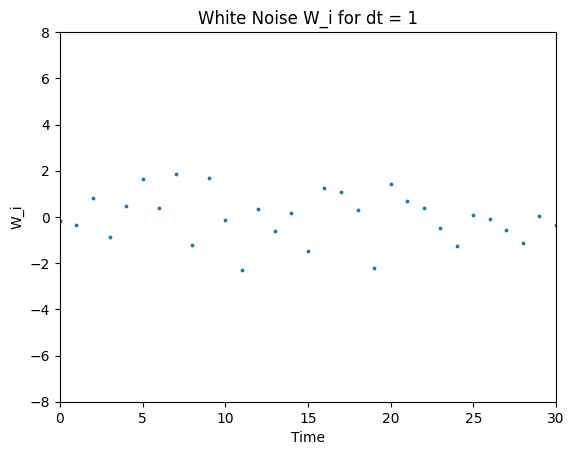

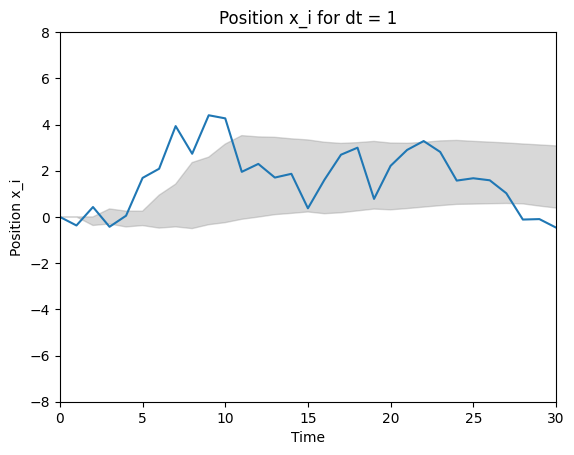

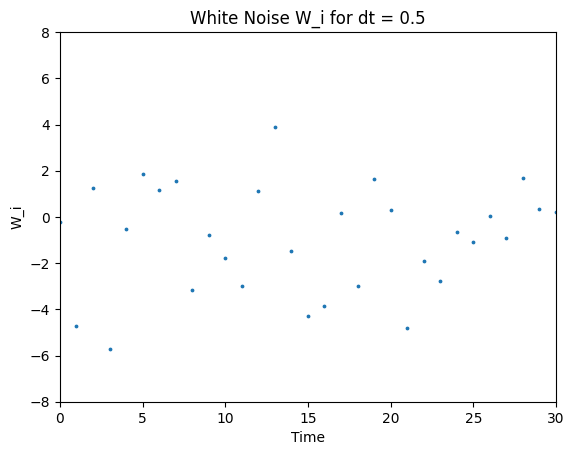

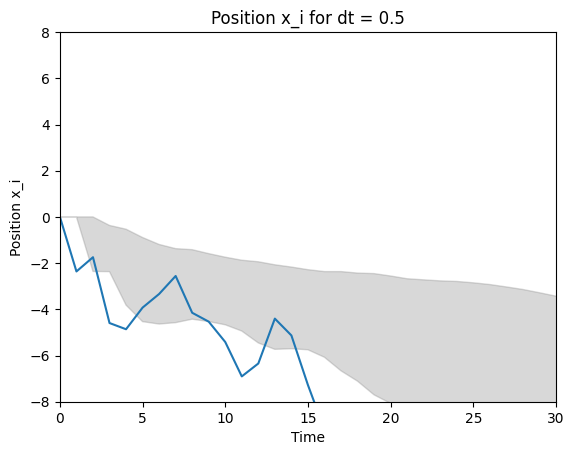

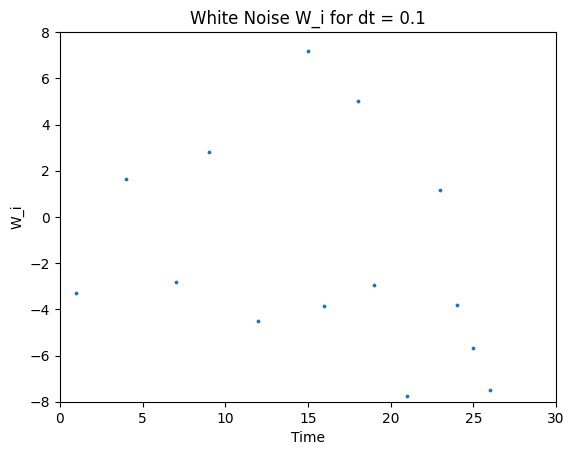

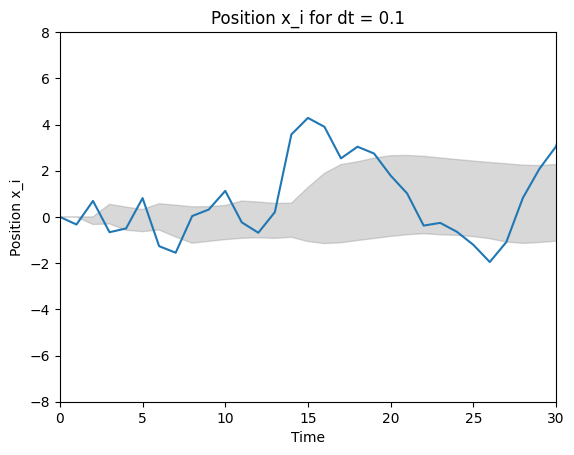

[ 5.46291713 -1.03926486  3.22745867 ...  4.53805273 -3.12956887
  3.75924289]


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Function to generate white noise
def generate_white_noise(N, dt):
    w = np.random.normal(0, 1/np.sqrt(dt), N)
    return w

# Function to generate positions
def generate_positions(N, dt, w):
    x = np.zeros(N)
    for i in range(1, N):
        x[i] = x[i-1] + np.sqrt(dt) * w[i]
    return x

# Parameters
N = 10000
t = np.arange(0, N)
dt_values = [1, 0.5, 0.1]

# Generate white noise and positions for each dt
for dt in dt_values:
    w = generate_white_noise(N, dt)
    W = w / np.sqrt(dt)
    x = generate_positions(N, dt, w)

    # Plot W_i
    plt.figure()
    plt.scatter(t, W, s=3)
    plt.ylim(-8, 8)
    plt.xlim(0, 30)
    plt.xlabel('Time')
    plt.ylabel('W_i')
    plt.title('White Noise W_i for dt = {}'.format(dt))

    # Plot x_i with shaded variance area
    plt.figure()
    plt.plot(t, x)
    plt.ylim(-8, 8)
    plt.xlim(0, 30)
    plt.xlabel('Time')
    plt.ylabel('Position x_i')
    plt.title('Position x_i for dt = {}'.format(dt))

    # Calculate and plot shaded variance area
    mean_x = np.zeros(N)
    variance_x = np.zeros(N)
    for i in range(1, N):
        mean_x[i] = np.mean(x[:i])
        variance_x[i] = np.var(x[:i])
    plt.fill_between(t, mean_x - np.sqrt(variance_x), mean_x + np.sqrt(variance_x), color='gray', alpha=0.3)

plt.show()

print(w)


5.777777777777777e-07
[0.00000000e+00 0.00000000e+00 3.63925204e-03 ... 5.34334769e+00
 5.35161077e+00 5.36397216e+00]


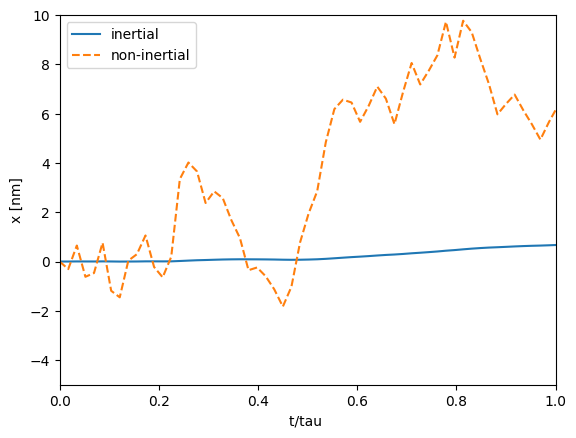

In [26]:
import numpy as np
import matplotlib.pyplot as plt

N=10000
Dt=10*1e-9 #s
Dt_=0.0000002
T=300
R=1e-6
d=2.6e+3 #density in kg/m3
kB = 1.38e-23  # Boltzmann constant [J/K]
gamma = 6 * np.pi * R * eta  # friction coefficient
m = (4/3) * np.pi * R**3 * d  # particle mass
tau = m / gamma  # momentum relaxation time
x = np.zeros(N)
print(tau)
#With inertia
#def inertial(N, Dt, x1, x2, R, T, eta, d):
#x1,x2=0
for i in range(2, N):
  x[i] = (2 + Dt * gamma / m) / (1 + Dt * gamma / m) * x[i-1] \
  - 1 / (1 + Dt * gamma / m) * x[i-2] \
  + np.sqrt(2 * kB * T * gamma) / (m + Dt * gamma) *((Dt)**(3/2))*w[i]
X=x*1e9
print(X)
#Witout inertia
x_ = np.zeros(N)

for i in range(1, N):
  x_[i] = x_[i-1] + np.sqrt(2 * kB * T*Dt_ /gamma) *w[i]
  #x_.append(x[i])
X_=x_*1e9




t = np.arange(0, N * Dt, Dt)
t=t/tau
plt.figure()
plt.plot(t, X,label='inertial')
plt.plot(t, X_,'--',label='non-inertial')
plt.xlabel('t/tau ')
plt.ylabel('x [nm]')
plt.ylim(-5,10)
plt.xlim(0, 1)
plt.legend()
plt.show()

[   0.            0.          302.51030202 ... 8536.83264462 8243.49769464
 8595.8521454 ]
[0.00000000e+00 3.46153846e+06 6.92307692e+06 ... 3.46050000e+10
 3.46084615e+10 3.46119231e+10]


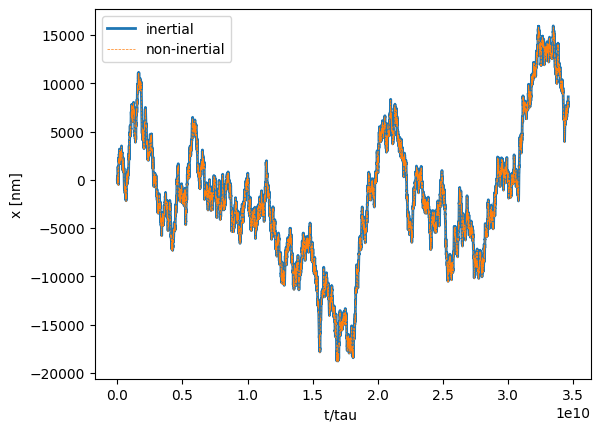

In [6]:
import numpy as np
import matplotlib.pyplot as plt

N=10000
Dt=0.0002 #s
d=2.6e+3 #density in kg/m3
kB = 1.38e-23  # Boltzmann constant [J/K]
gamma = 6 * np.pi * R * eta  # friction coefficient
m = (4/3) * np.pi * R**3 * d  # particle mass
tau = m / gamma  # momentum relaxation time
x = np.zeros(N)

#With inertia
#def inertial(N, Dt, x1, x2, R, T, eta, d):
#x1,x2=0
for i in range(2, N):
  x[i] = (2 + Dt * gamma / m) / (1 + Dt * gamma / m) * x[i-1] \
  - 1 / (1 + Dt * gamma / m) * x[i-2] \
  + np.sqrt(2 * kB * T * gamma) / (m + Dt * gamma) *((Dt)**(3/2))*w[i]
X=x*1e9 # in nm
print(X)
#Witout inertia
x_ = np.zeros(N)

for i in range(1, N):
  x_[i] = x_[i-1] + np.sqrt(2 * kB * T*Dt /gamma) *w[i]
  #x_.append(x[i])
X_=x_*1e9 # in nm




t = np.arange(0, N * Dt, Dt)
t=t/tau
print(t)
plt.figure()
plt.plot(t, X,linewidth=2,label='inertial')
plt.plot(t, X_,'--',linewidth=0.5, label='non-inertial')
plt.xlabel('t/tau ')
plt.ylabel('x [nm]')
#plt.ylim(-0.5,0.5)
#plt.xlim(0, 100)
plt.legend()
plt.show()



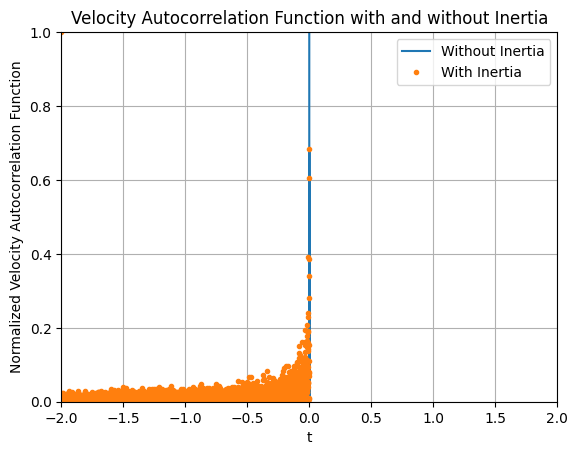

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import correlate

# Function to calculate the autocorrelation function
def acf(x, Dt):
    v = np.diff(x) / Dt
    r = correlate(v, v, mode='full', method='auto')
    r = r[len(r)//2:]
    r /= (len(v) - np.arange(len(r)))
    s = Dt * np.arange(len(r))
    return r, s

# Parameters
N = 10000
Dt = 1e-8  # for the case of inertia
Dt_ = 0.0002  # for the case without inertia
kB = 1.38e-23  # Boltzmann constant [J/K]
T = 300  # Temperature [K]
eta = 0.001  # Viscosity [Pa s]
R = 10e-9  # Particle radius [m]
d = 2.6e3  # Density [kg/m^3]
gamma = 6 * np.pi * R * eta  # Friction coefficient
m = (4/3) * np.pi * R**3 * d  # Particle mass
tau = m / gamma  # Momentum relaxation time

# Generate example data for the Brownian motion with and without inertia
w = np.random.normal(0, 1/np.sqrt(Dt), N)
x_with_inertia = np.zeros(N)
x_without_inertia = np.zeros(N)

for i in range(2, N):
    x_with_inertia[i] = (2 + Dt * gamma / m) / (1 + Dt * gamma / m) * x_with_inertia[i-1] \
                        - 1 / (1 + Dt * gamma / m) * x_with_inertia[i-2] \
                        + np.sqrt(2 * kB * T * gamma) / (m + Dt * gamma) * (Dt**(3/2)) * w[i]

for i in range(1, N):
    x_without_inertia[i] = x_without_inertia[i-1] + np.sqrt(2 * kB * T * Dt_ / gamma) * w[i]

# Calculate autocorrelation functions for both cases
r_with_inertia, s_with_inertia = acf(x_with_inertia, Dt)
r_without_inertia, s_without_inertia = acf(x_without_inertia, Dt_)

# Normalize the autocorrelation functions
r_with_inertia_norm = r_with_inertia / np.max(np.abs(r_with_inertia))
r_without_inertia_norm = r_without_inertia / np.max(np.abs(r_without_inertia))

# Plot the velocity autocorrelation function
plt.figure()
plt.plot(s_with_inertia - N*Dt, r_with_inertia_norm, label='Without Inertia') ##To be verified
plt.plot(s_without_inertia - N*Dt_, r_without_inertia_norm, '.',label='With Inertia') ##To be verified
plt.xlabel('t')
plt.ylabel('Normalized Velocity Autocorrelation Function')
plt.xlim(-2,2)
plt.ylim(0,1)
plt.legend()
plt.title('Velocity Autocorrelation Function with and without Inertia')
plt.grid(True)
plt.show()


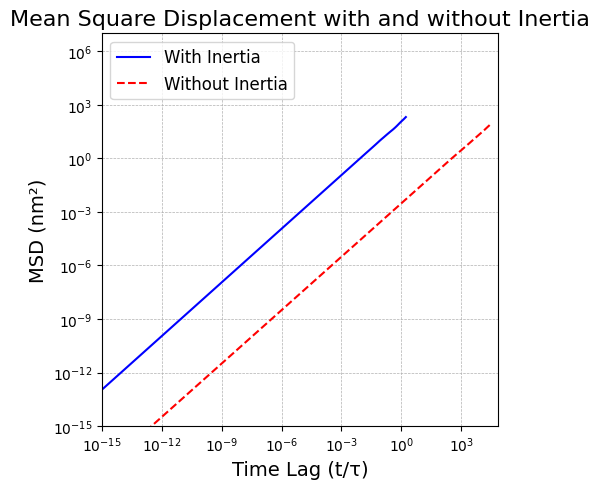

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# **Parameters for the simulation**
Dt = 1e-8  # **Time step for the case of inertia**
Dt_ = 0.0002  # **Time step for the case without inertia**
tau = 0.6e-6  # **Characteristic time scale**

def MSD(x, Dt, tau):
    n_max = int(np.sqrt(len(x)))
    msd = np.zeros(n_max + 1)

    for n in range(n_max + 1):
        msd[n] = np.mean((x[n:] - x[:len(x)-n])**2)

    s = Dt * np.arange(len(msd)) / tau  # **Adjusted for respective time step**
    return msd, s

# **Simulating Brownian motion**
N = 10000
w = np.random.normal(0, 1/np.sqrt(Dt), N)  # **Case with inertia**
w_ = np.random.normal(0, 1/np.sqrt(Dt_), N)  # **Case without inertia**
x_with_inertia = np.zeros(N)
x_without_inertia = np.zeros(N)

# **Generate Brownian motion with inertia**
for i in range(1, N):
    x_with_inertia[i] = x_with_inertia[i-1] + np.sqrt(2 * Dt) * w[i]

# **Generate Brownian motion without inertia**
for i in range(1, N):
    x_without_inertia[i] = x_without_inertia[i-1] + np.sqrt(Dt_) * w_[i]

# **Calculate MSD for both cases**
msd, s = MSD(x_with_inertia, Dt, tau)  # **Using Dt for inertia**
msd_, s_ = MSD(x_without_inertia, Dt_, tau)  # **Using Dt_ for without inertia**

# **Plotting the results**
plt.figure(figsize=(5, 5))
plt.loglog(s, msd, label='With Inertia', color='blue', linestyle='-')
plt.loglog(s_, msd_, label='Without Inertia', color='red', linestyle='--')
plt.xlabel('Time Lag (t/τ)', fontsize=14)
plt.ylabel('MSD (nm²)', fontsize=14)
plt.title('Mean Square Displacement with and without Inertia', fontsize=16)
plt.legend(loc='upper left', fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xlim(left=1e-15)  # **Adjusted limits if needed**
plt.ylim(bottom=1e-15, top=1e7)  # **Example limits; adjust as necessary**
plt.tight_layout()
plt.show()
